<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/ex08_%EA%B0%9C%2C%EA%B3%A0%EC%96%91%EC%9D%B4_mlp%2Ccnn%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ex08_개,고양이_mlp,cnn실습.ipynb
# 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 딥러닝 폴더까지 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


### 목표
- mlp, cnn 모델을 활용하여 이미지 분류 실습을 진행해보자
- 개, 고양이 2개의 클래스를 분류하는 이진분류를 진행해보자
- 성능을 높이기 위한 노력을 진행해보자
  - 이미지 증식 : 이미지 개체수를 늘려서 학습시킴
  - 전이학습 : 사전에 학습이되어 성능이 좋은 분류 모델을 연결하여 사용해보자

In [3]:
# 환경세팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# npz 파일 불러오기
# X_train,X_test,y_train,y_test 총 4 개 잘 가지고 있는지 확인
# np.load('경로설정')
data=np.load('./data/npz_cats_vs_dogs.npz')
type(data)

numpy.lib.npyio.NpzFile

In [5]:
len(data)
# 각 변수에 나눠서 담아주기
X_train=data['X_train']
X_test=data['X_test']
y_train=data['y_train']
y_test=data['y_test']

# 크기확인
print('훈련셋:',X_train.shape,y_train.shape)
print('테스트셋:',X_test.shape,y_test.shape)

훈련셋: (2000, 224, 224, 3) (2000,)
테스트셋: (2000, 224, 224, 3) (1000,)


#### mlp 모델 생성
- mlp 기반 모델 설계
- complie : 학습 및 평가 방법 설정
- fit : 학습 및 학습 현황 시각화
- predict / evaluate

In [6]:
# 이미지 데이터 다루기 위해서 필요한  tf 도구
# 2차원 => 1차원, 3차원 => 1차원 펴주는 기능 : Flatten()
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# 조기학습 중단 - 설정한 반복횟수만큼 다 학습할 필요가 없다고 생각되면 연결
# 성능향상이 없는데 계속 반복할 경우 과대적합 우려가 발생
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
X_train[0].shape

(224, 224, 3)

In [8]:
# 모델 설계
# 뼈대 구축
mlp_model=Sequential()

# 입력층
# 3차원 => 1차원 펴주는 기능
# 이미지 한장의 크기 :
mlp_model.add(Flatten(input_shape=(224,224,3)))

# 중간층
# 3개 (256, 128, 64)
mlp_model.add(Dense(256,activation='relu'))
mlp_model.add(Dense(128,activation='relu'))
mlp_model.add(Dense(64,activation='relu'))

# 출력층
# 이진분류 내용으로 설정
# units = 1, activation = 'sigmoid'
mlp_model.add(Dense(1,activation='sigmoid'))

# 모델 요약
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 38576641 (147.16 MB)
Trainable params: 38576641 (147.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 컴파일
mlp_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# 조기학습 중단
# 특정값을 기준으로 5 번 정도 값이 갱신이 되지 않는다면 학습 멈춤
# 특정값 => 검증데이터 정확도 기준
f_early=EarlyStopping('val_accuracy', # 멈추는 기준값
                      patience=5, # 성능 개선을 기다리는 횟수
                      verbose=1) # 조기학습 중단 메세지 출력

# 학습 코드까지 짜보기
# 50 반복횟수
# 검증데이터 연결하는 키워드 :
# 1. validation_split = 0.3 (30%) , 2. validation_data = (검증문제, 검증답)
# 조기학습 중단 연결
mlp_his=mlp_model.fit(X_train,y_train,
                      validation_split=0.3,
                      epochs=50,
                      callbacks=[f_early])

Epoch 1/50
44/44 [==============================] - 8s 29ms/step - loss: 4225.9917 - accuracy: 0.5807 - val_loss: 5025.2817 - val_accuracy: 0.0000e+00
Epoch 2/50
44/44 [==============================] - 1s 17ms/step - loss: 617.4614 - accuracy: 0.6207 - val_loss: 449.3107 - val_accuracy: 0.1783
Epoch 3/50
44/44 [==============================] - 1s 17ms/step - loss: 558.4559 - accuracy: 0.6379 - val_loss: 3049.2959 - val_accuracy: 0.0000e+00
Epoch 4/50
44/44 [==============================] - 1s 15ms/step - loss: 402.4485 - accuracy: 0.6279 - val_loss: 2611.0349 - val_accuracy: 0.0000e+00
Epoch 5/50
44/44 [==============================] - 1s 14ms/step - loss: 343.2751 - accuracy: 0.6400 - val_loss: 2450.2402 - val_accuracy: 0.0000e+00
Epoch 6/50
44/44 [==============================] - 1s 14ms/step - loss: 283.4824 - accuracy: 0.6450 - val_loss: 1278.0682 - val_accuracy: 0.0000e+00
Epoch 7/50
44/44 [==============================] - 1s 15ms/step - loss: 225.2314 - accuracy: 0.6521 - v

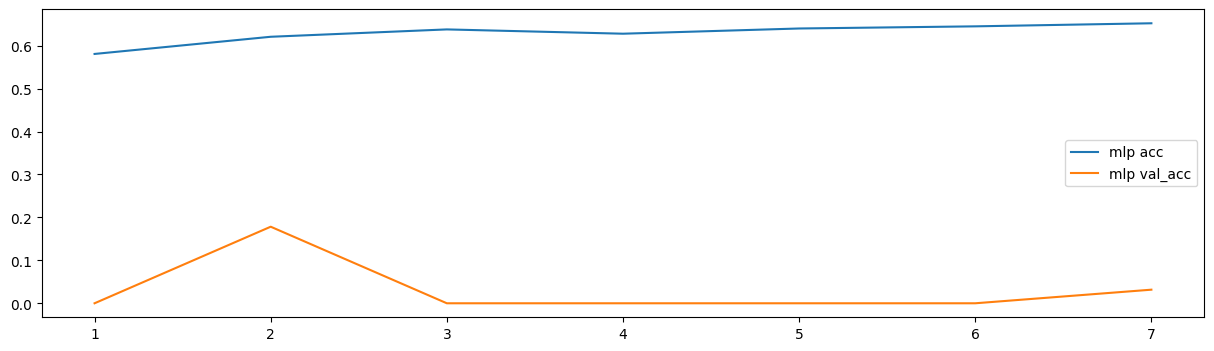

In [10]:
# val_accuracy, accuracy 선 그래프 시각화
# x축 반복횟수, y축 val_accuracy, accuracy
plt.figure(figsize=(15,4))
x_range=len(mlp_his.history['accuracy'])
plt.plot(range(1,x_range+1),mlp_his.history['accuracy'],label='mlp acc')
plt.plot(range(1,x_range+1),mlp_his.history['val_accuracy'],label='mlp val_acc')
plt.legend()
plt.show()

In [11]:
# 복잡한 데이터에 비해 모델은 너무 단순한 상태
# 일반 다층 퍼셋트론 모델은 복잡한 이미지에 대한 학습 성능이 떨어짐
# 복잡한 이미지에 대해, 그 안의 특성값에 대해 잘 학습할 수 있는 도구가 없을까?